In [1]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [37]:
data = pd.read_csv("data/house_price/data.csv")

In [ ]:
data.shape

(4600, 18)

In [ ]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [ ]:
#data.describe()
#correlacion entre los datos para elegir que datos quiero tomar para hacer una regresion
data.corr(numeric_only = True)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
price,1.000000,0.200336,0.327110,0.430410,0.050451,0.151461,0.135648,0.228504,0.034915,0.367570,0.210427,0.021857,-0.028774
bedrooms,0.200336,1.000000,0.545920,0.594884,0.068819,0.177895,-0.003483,0.111028,0.025080,0.484705,0.334165,0.142461,-0.061082
bathrooms,0.327110,0.545920,1.000000,0.761154,0.107837,0.486428,0.076232,0.211960,-0.119994,0.689918,0.298020,0.463498,-0.215886
sqft_living,0.430410,0.594884,0.761154,1.000000,0.210538,0.344850,0.117616,0.311009,-0.062826,0.876443,0.447206,0.287775,-0.122817
sqft_lot,0.050451,0.068819,0.107837,0.210538,1.000000,0.003750,0.017241,0.073907,0.000558,0.216455,0.034842,0.050706,-0.022730
floors,0.151461,0.177895,0.486428,0.344850,0.003750,1.000000,0.022024,0.031211,-0.275013,0.522814,-0.255510,0.467481,-0.233996
waterfront,0.135648,-0.003483,0.076232,0.117616,0.017241,0.022024,1.000000,0.360935,0.000352,0.078911,0.097501,-0.023563,0.008625
view,0.228504,0.111028,0.211960,0.311009,0.073907,0.031211,0.360935,1.000000,0.063077,0.174327,0.321602,-0.064465,0.022967
condition,0.034915,0.025080,-0.119994,-0.062826,0.000558,-0.275013,0.000352,0.063077,1.000000,-0.178196,0.200632,-0.399698,-0.186818
sqft_above,0.367570,0.484705,0.689918,0.876443,0.216455,0.522814,0.078911,0.174327,-0.178196,1.000000,-0.038723,0.408535,-0.160426


In [53]:
#me di cuenta que hay valores de 0 en la columna price lo cual hace que no pueda analizar correctamente los precios, asi que limpieza de datos

filtered_data = data[data["price"] != 0]
filtered_data.to_csv("data_filtrada.csv", index=False)
print("Archivo filtrado de datos iguales a 0 guardado exitosamente")

Archivo filtrado de datos iguales a 0 guardado exitosamente


In [62]:
data_filtrada = pd.read_csv("data/house_price/data_filtrada.csv")

In [63]:
data_filtrada.shape

(4551, 18)

In [66]:
data_filtrada.corr(numeric_only = True)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
price,1.000000,0.210228,0.341126,0.445494,0.051347,0.152758,0.150083,0.242587,0.038892,0.380661,0.217782,0.021757,-0.029034
bedrooms,0.210228,1.000000,0.547612,0.596053,0.071138,0.176219,-0.005521,0.115080,0.023018,0.485672,0.335103,0.141498,-0.062219
bathrooms,0.341126,0.547612,1.000000,0.757213,0.109331,0.489548,0.063310,0.205536,-0.120765,0.687208,0.295832,0.464239,-0.218160
sqft_living,0.445494,0.596053,0.757213,1.000000,0.213268,0.343513,0.107758,0.309343,-0.062529,0.875657,0.449671,0.284733,-0.121589
sqft_lot,0.051347,0.071138,0.109331,0.213268,1.000000,0.004245,0.017408,0.072527,0.000929,0.219193,0.035894,0.049163,-0.021068
floors,0.152758,0.176219,0.489548,0.343513,0.004245,1.000000,0.015804,0.031980,-0.273786,0.522215,-0.255042,0.466691,-0.235969
waterfront,0.150083,-0.005521,0.063310,0.107758,0.017408,0.015804,1.000000,0.347572,0.006112,0.072502,0.088880,-0.032017,0.015821
view,0.242587,0.115080,0.205536,0.309343,0.072527,0.031980,0.347572,1.000000,0.062560,0.174629,0.317117,-0.066344,0.025846
condition,0.038892,0.023018,-0.120765,-0.062529,0.000929,-0.273786,0.006112,0.062560,1.000000,-0.176549,0.197144,-0.398886,-0.184483
sqft_above,0.380661,0.485672,0.687208,0.875657,0.219193,0.522215,0.072502,0.174629,-0.176549,1.000000,-0.037597,0.406436,-0.161281


In [67]:
prices = data_filtrada["price"]


# Calcular valores
valor_minimo = prices.min()
valor_maximo = prices.max()
valor_medio = prices.mean()

# Imprimir resultados
print(f"Valor mínimo: {valor_minimo}")
print(f"Valor máximo: {valor_maximo}")
print(f"Valor medio: {valor_medio}")

Valor mínimo: 7800.0
Valor máximo: 26590000.0
Valor medio: 557905.8991379443


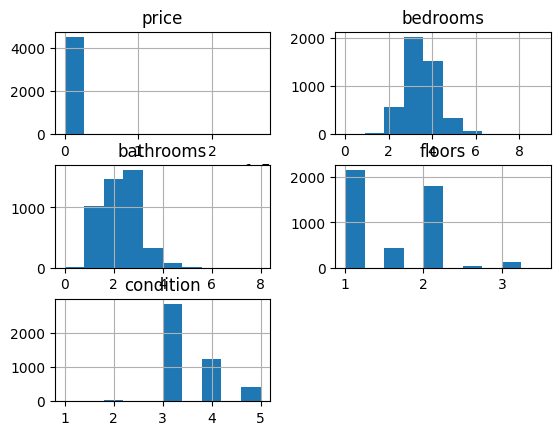

In [68]:
data_filtrada.drop(columns = ["date", "statezip", "waterfront", "sqft_living","sqft_lot", "view", "sqft_above", "sqft_basement", "yr_built", "yr_renovated", "country"]).hist()
plt.show()

In [ ]:
filtered_data = data[(data["price"] <= 3500) & (data["# Shares"] <= 80000)]
colors = ["blue", "red"]
size = [30, 60]

f1 = filtered_data["Word count"].values
f2 = filtered_data["# Shares"].values

assign = []
for index, row in filtered_data.iterrows():
    if(row["Word count"] > 1808):
        assign.append(colors[0])
    else:
        assign.append(colors[1])
plt.scatter(f1, f2, c=assign, s=size[0])
plt.xlabel("conteo de palabras")
plt.ylabel("compartido en redes")
plt.show()